In [1]:
#  installed the scikit-learn in my anaconda environment.
# !conda install --yes scikit-learn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.datasets import load_digits

In [2]:
# To load the data (already transformed into a csv file)
data = pd.read_csv('final_data_cleaned.csv')
data = pd.DataFrame(data)
x = data.drop(columns = 'type')
y = data['type']
len(x)
len(y)
x_list = x.values.tolist()
y_list = y.values.tolist()

In [3]:
features = x.columns.tolist() # get all the attribute names and store them in a list
uniquetypes = np.unique(y).tolist() # there are different types of the vehicle, store them in a list
uniquetypes
features

['compactness',
 'radius',
 'circularity',
 'radius_ratio',
 'pr_ratio',
 'max_ratio',
 'scatter_ratio',
 'elongatedness',
 'pr_rectangularity',
 'max_rectangularity',
 'scaled_major',
 'scaled_minor',
 'scaled_radius',
 'skewness_major',
 'skewness_minor',
 'kurtosis_minor',
 'kurtosis_major',
 'hollows_ratio']

In [4]:
# spliting the training and testing datasets:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.3)
x_train

,compactness,radius,circularity,radius_ratio,pr_ratio,max_ratio,scatter_ratio,elongatedness,pr_rectangularity,max_rectangularity,scaled_major,scaled_minor,scaled_radius,skewness_major,skewness_minor,kurtosis_minor,kurtosis_major,hollows_ratio
435,106,52,101,213,64,11,201,33,23,158,214,607,204,65,2,4,192,204
311,82,44,63,123,54,7,151,45,19,147,166,329,185,81,3,4,179,182
261,107,57,106,179,51,8,257,26,28,172,275,954,232,83,2,20,181,184
136,91,40,76,171,67,7,149,44,19,135,169,332,144,68,4,17,192,200
294,109,51,100,197,59,10,192,34,22,161,210,553,195,64,14,3,196,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,88,40,78,186,73,6,158,41,20,134,185,379,148,73,1,11,193,197
212,86,41,66,133,56,6,136,49,18,136,155,274,162,74,5,14,183,189
230,101,55,108,228,69,12,215,31,24,168,229,684,214,71,2,16,188,199
777,103,51,105,174,56,11,210,32,24,163,222,650,222,73,8,9,187,196


In [54]:
# Create Decision Tree classifer object
clf_default = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf_default = clf_default.fit(x_train,y_train)
y_pred_default=clf_default.predict(x_test)

# Prediction Accuracy:
print("Accuracy:", clf_default.score(x_test, y_test))


Accuracy: 0.643859649122807


In [41]:
x_train_list = x_train.values.tolist()
y_train_list = y_train.values.tolist()


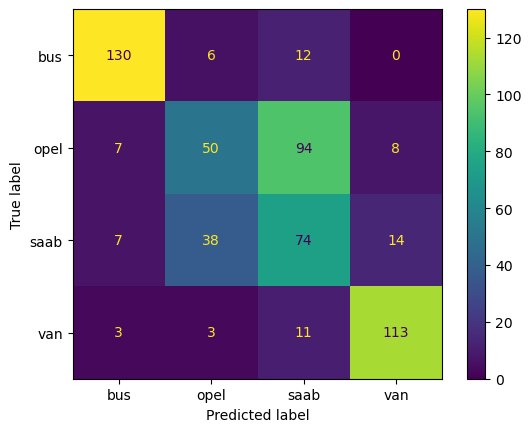

<Figure size 50x50 with 0 Axes>

In [7]:
plot_confusion_matrix(clf_default, x_test, y_test)

plt.figure(figsize=(0.5,0.5))
plt.show()

In [8]:
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

         bus       0.88      0.88      0.88       148
        opel       0.52      0.31      0.39       159
        saab       0.39      0.56      0.46       133
         van       0.84      0.87      0.85       130

    accuracy                           0.64       570
   macro avg       0.66      0.65      0.65       570
weighted avg       0.65      0.64      0.64       570



[Text(258.33333333333337, 332.64, 'scaled_major <= 179.5\ngini = 0.744\nsamples = 244\nvalue = [61, 49, 75, 59]\nclass = saab'),
 Text(155.0, 258.71999999999997, 'max_ratio <= 8.5\ngini = 0.675\nsamples = 127\nvalue = [34, 13, 21, 59]\nclass = van'),
 Text(82.66666666666667, 184.8, 'elongatedness <= 46.5\ngini = 0.716\nsamples = 91\nvalue = [34, 11, 20, 26]\nclass = bus'),
 Text(41.333333333333336, 110.88, 'skewness_minor <= 11.0\ngini = 0.418\nsamples = 45\nvalue = [33, 3, 9, 0]\nclass = bus'),
 Text(20.666666666666668, 36.960000000000036, '\n  (...)  \n'),
 Text(62.0, 36.960000000000036, '\n  (...)  \n'),
 Text(124.0, 110.88, 'compactness <= 84.5\ngini = 0.593\nsamples = 46\nvalue = [1, 8, 11, 26]\nclass = van'),
 Text(103.33333333333334, 36.960000000000036, '\n  (...)  \n'),
 Text(144.66666666666669, 36.960000000000036, '\n  (...)  \n'),
 Text(227.33333333333334, 184.8, 'radius <= 39.5\ngini = 0.156\nsamples = 36\nvalue = [0, 2, 1, 33]\nclass = van'),
 Text(206.66666666666669, 110.8

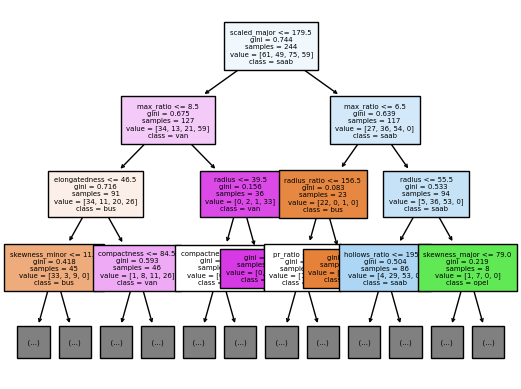

In [11]:
plot_tree(clf_default, feature_names = x_train.columns, filled = True, class_names= uniquetypes, max_depth=3, fontsize = 5)

In [12]:
# Tuning the hyperparameter of the DecisionTreeClassifier() function to improve the accuracy:
# a. The 
DT = DecisionTreeClassifier()
score = cross_val_score(DT,x_train,y_train,cv=10).mean()
print('Gini Score: %.4f'%score)
DT = DecisionTreeClassifier(criterion = 'entropy')
score = cross_val_score(DT,x,y,cv=10).mean()
print('Entropy Score: %.4f'%score)

# The entropy score is slightly higher than the Gini Score. 
# So for the later tuning process, i will keep using the 'entropy' (C_4.5 algorithm)


Gini Score: 0.7012
Entropy Score: 0.7223


The best max_depth:  8.0
The score of the best max_depth:  0.7174495633845226


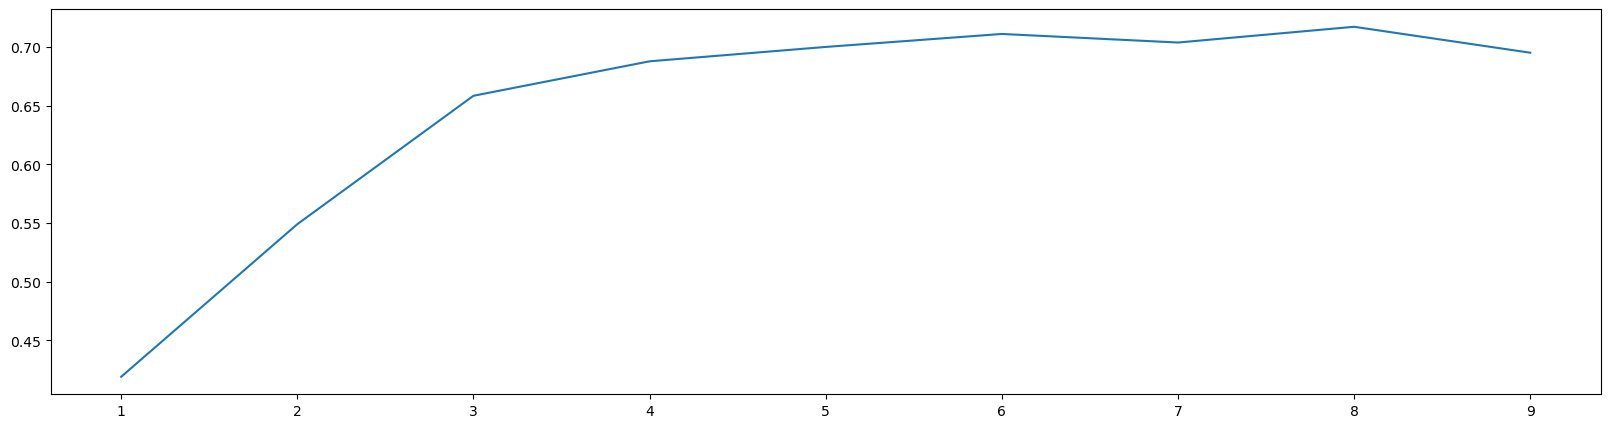

In [19]:
# Tuning the 'max_depth'
ScoreAll = []
for i in range(1,10,1):
    DT = DecisionTreeClassifier(max_depth = i, criterion = 'entropy')
    score = cross_val_score(DT,x, y,cv=10).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0] # find the indexes of the parameter with highest score
print("The best max_depth: ",ScoreAll[max_score][0])
print("The score of the best max_depth: ",ScoreAll[max_score][1])
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()

The best min_samples_split:  2.0
The score of the best min_samples_split:  0.7235772357723577


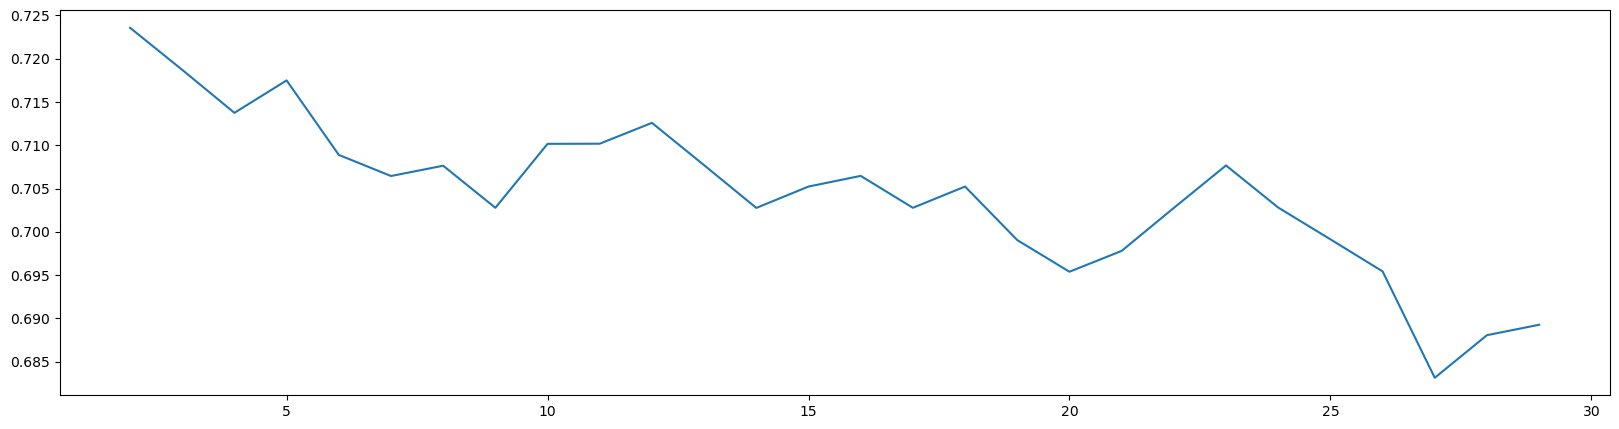

In [27]:
# Tuning the 'min_samples_split' with (the best max_depth = 8)
ScoreAll = []
for i in range(2,30):
    DT = DecisionTreeClassifier(max_depth = 8, min_samples_split = i, criterion = 'entropy')
    score = cross_val_score(DT,x,y,cv=10).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0] 
print("The best min_samples_split: ",ScoreAll[max_score][0])
print("The score of the best min_samples_split: ",ScoreAll[max_score][1])
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()

The best min_samples_leaf:  1.0
The score of the best min_samples_leaf:  0.7211532670882264


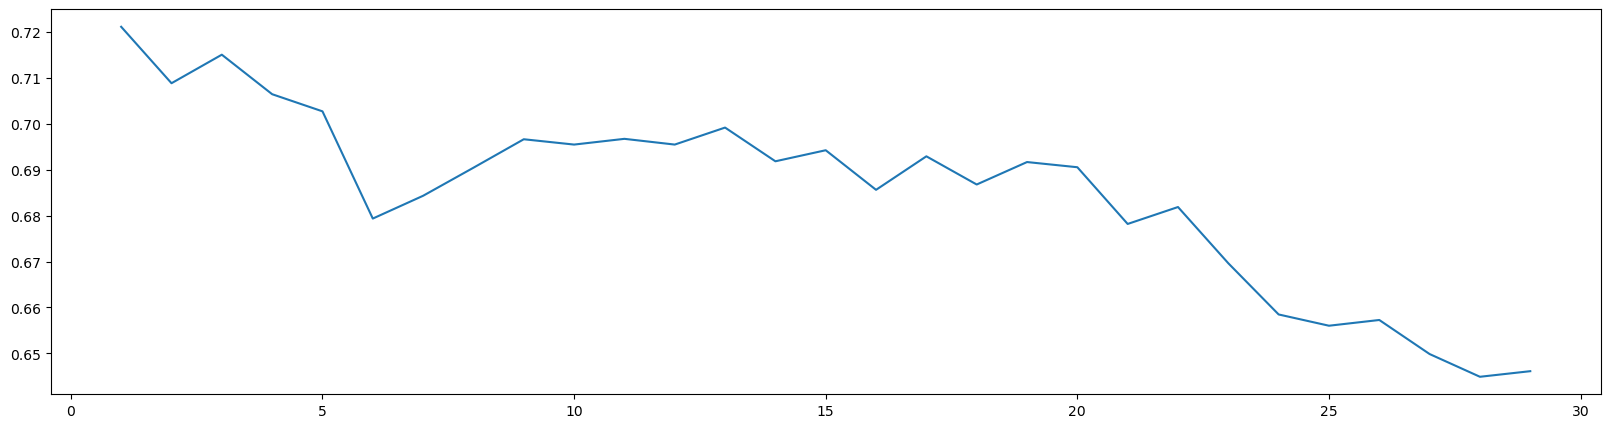

In [28]:
# Tuning the 'min_samples_leaf' with (the best max_depth = 8, and the best min_samples_split = 2)
ScoreAll = []
for i in range(1,30):
    DT = DecisionTreeClassifier(min_samples_leaf = i, max_depth = 8, criterion = 'entropy', min_samples_split = 2)
    score = cross_val_score(DT,x,y,cv=10).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)
max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0] 
print("The best min_samples_leaf: ",ScoreAll[max_score][0])
print("The score of the best min_samples_leaf: ",ScoreAll[max_score][1])# print(ScoreAll[,0])
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()

In [29]:
# Tuning the 'max_depth', 'min_samples_leaf' and 'min_samples_split' together!
param_grid = {
    'max_depth':np.arange(6, 9),
    'min_samples_leaf':np.arange(1, 4),
    'min_samples_split':np.arange(2, 5)}

rfc = DecisionTreeClassifier(criterion = 'entropy')
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(x,y)
print(GS.best_params_)
print(GS.best_score_)

{'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 4}
0.7212134899126769


In [39]:
# Using the new hyperparameter which are tuned:
new_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, min_samples_leaf = 3, min_samples_split = 4)
# Train Decision Tree Classifer

new_clf = new_clf.fit(x_train,y_train)

# Prediction Accuracy:""
print("Accuracy:", new_clf.score(x_test, y_test))

Accuracy: 0.6859649122807018


[Text(248.0, 332.64, 'scaled_major <= 179.5\nentropy = 1.983\nsamples = 244\nvalue = [61, 49, 75, 59]\nclass = saab'),
 Text(146.54545454545456, 258.71999999999997, 'max_ratio <= 8.5\nentropy = 1.789\nsamples = 127\nvalue = [34, 13, 21, 59]\nclass = van'),
 Text(90.18181818181819, 184.8, 'scaled_minor <= 305.5\nentropy = 1.896\nsamples = 91\nvalue = [34, 11, 20, 26]\nclass = bus'),
 Text(45.09090909090909, 110.88, 'compactness <= 82.5\nentropy = 1.518\nsamples = 46\nvalue = [1, 8, 11, 26]\nclass = van'),
 Text(22.545454545454547, 36.960000000000036, '\n  (...)  \n'),
 Text(67.63636363636364, 36.960000000000036, '\n  (...)  \n'),
 Text(135.27272727272728, 110.88, 'skewness_minor <= 11.0\nentropy = 1.053\nsamples = 45\nvalue = [33, 3, 9, 0]\nclass = bus'),
 Text(112.72727272727273, 36.960000000000036, '\n  (...)  \n'),
 Text(157.8181818181818, 36.960000000000036, '\n  (...)  \n'),
 Text(202.90909090909093, 184.8, 'max_rectangularity <= 137.0\nentropy = 0.49\nsamples = 36\nvalue = [0, 2, 

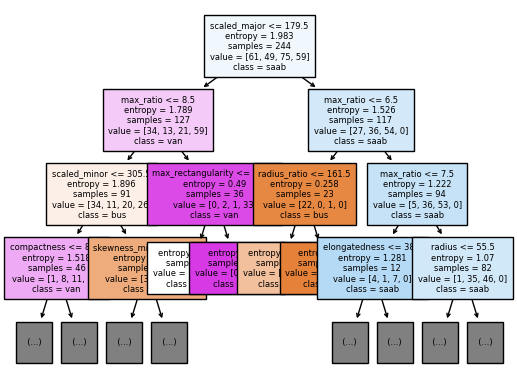

In [61]:
# Plot the decision tree with the class names:
plot_tree(new_clf, feature_names = x_train.columns, filled = True, max_depth = 3, class_names= uniquetypes, fontsize = 6)
# plt.savefig("decistion_tree.png") # save the whole figure into png.file. 

In [62]:
# Get the accuracy report for the new tuned model:
print(classification_report(y_test, new_clf.predict(x_test)))

              precision    recall  f1-score   support

         bus       0.88      0.95      0.91       148
        opel       0.58      0.29      0.39       159
        saab       0.47      0.71      0.56       133
         van       0.86      0.85      0.85       130

    accuracy                           0.69       570
   macro avg       0.70      0.70      0.68       570
weighted avg       0.70      0.69      0.67       570

